## Portfolio2- Classification
### Qiaoyu Wang

#### 0. Import

In [1]:
#Data and plotting imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Machine learning imports
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
#https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
#A Function to plot decision boundarys
def plot_decision(X,y,model,n_classes=2):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    model.fit(X, y)
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='binary_r')
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')

#### 1. Load in the dataset

In [3]:
df = pd.read_csv("data/apple_quality.csv")
df = df.dropna()
df.loc[(df["Quality"]=="good"), 'Quality'] = 0
df.loc[(df["Quality"]=="bad"), 'Quality'] = 1
w = df.sort_values("Quality")[0:1500]
r = df.sort_values("Quality")[-1500:]
df = pd.concat([w,r])
df = df.drop(columns=['A_id']) 
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

#### 2. Decision Tree


#### 2.1 Selected Features Training

In [4]:
#Pick two features
feature1 = "Ripeness"
feature2 = "Juiciness"
# feature3 = 'Acidity'
#Pick max_depth
max_depth = 6

In [5]:
#Train model, plot decision boundary 
x = df[[feature1,feature2]].values
y = pd.to_numeric(df["Quality"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)
#See if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
print("Accuracy:", acc)

Accuracy: 69.44444444444444


C:\Users\YYY70\AppData\Local\Temp\ipykernel_20252\1863830469.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


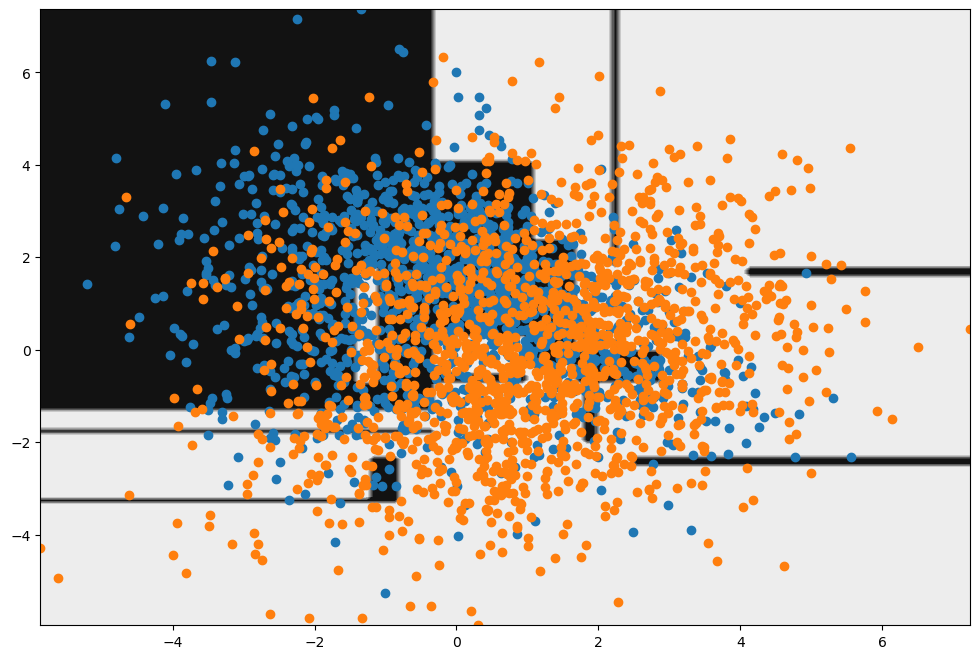

In [6]:
plt.figure(figsize=(12,8))
#Set bounds to min and max values of features 
plt.xlim([np.min(x[:,0]),np.max(x[:,0])])
plt.ylim([np.min(x[:,1]),np.max(x[:,1])])
plot_decision(x, y, model, 2)

In [7]:
conf_matrix_fds = confusion_matrix(y_test, y_pred)
conf_matrix_fds

array([[348, 145],
       [130, 277]], dtype=int64)

In [8]:
tn_fds, fp_fds, fn_fds, tp_fds = conf_matrix_fds.ravel()
precision_fds = tp_fds / ( tp_fds + fp_fds )
recall_fds = tp_fds / ( tp_fds + fn_fds )
precision_fds, recall_fds

(0.6563981042654028, 0.6805896805896806)

#### 2.2 Whole Feature Lists Training

In [9]:
max_depth1 = 5

Accuracy: 77.11111111111111


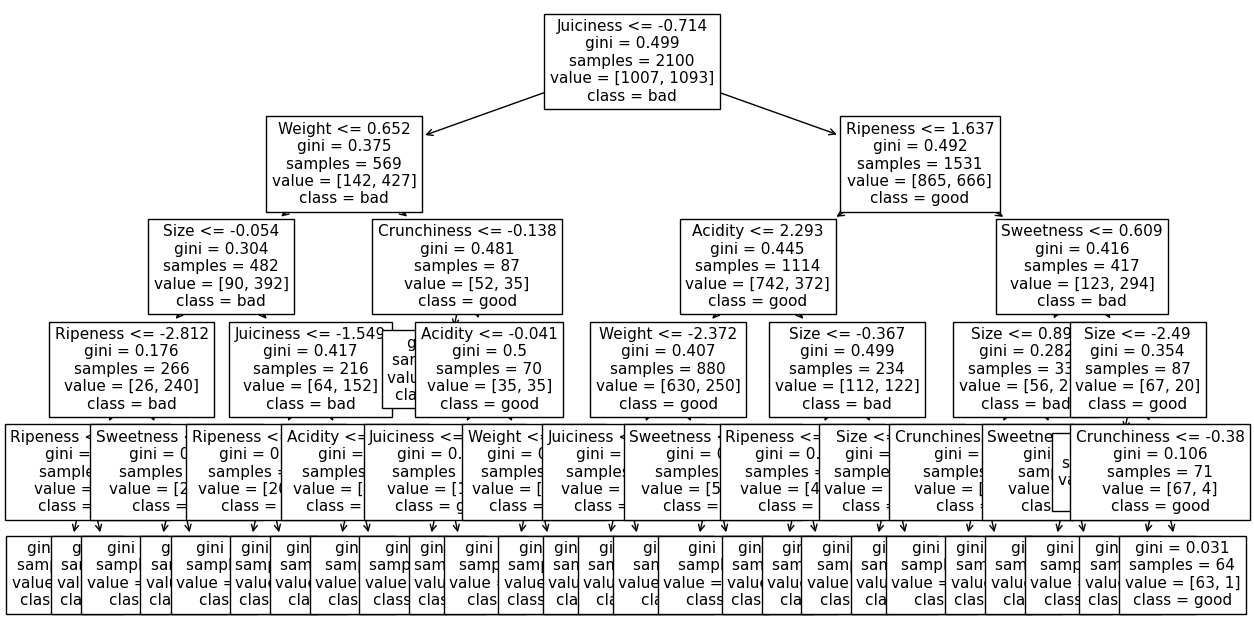

In [10]:
#Pick all features for input
x_labels = list(df.columns.values)
x_labels.remove("Quality")
x = df[x_labels]

#Fit model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth1)
model.fit(x_train,y_train)

#See if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100

print("Accuracy:", acc)

plt.figure(figsize=(15,8))
my_plot = plot_tree(model, feature_names=x_labels,fontsize=11,class_names = ["good","bad"]) 

In [11]:
conf_matrix_wds = confusion_matrix(y_test, y_pred)
conf_matrix_wds

array([[443,  50],
       [156, 251]], dtype=int64)

In [12]:
tn_wds, fp_wds, fn_wds, tp_wds = conf_matrix_wds.ravel()
precision_wds = tp_wds / ( tp_wds + fp_wds )
recall_wds = tp_wds / ( tp_wds + fn_wds )
precision_wds, recall_wds

(0.8338870431893688, 0.6167076167076168)

#### 2.3 Feature Importance

In [13]:
X = df.drop(columns=['Quality']) 
y = df['Quality'] 

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

Size: 0.271022937589157
Juiciness: 0.20543396650362772
Ripeness: 0.19614723896271966
Sweetness: 0.15426278761081313
Weight: 0.08934738375248395
Acidity: 0.05690533980989256
Crunchiness: 0.02688034577130591


#### 3. K-Nearest Neighbors (KNN)

#### 3.1 Selected Feature Set Training

In [14]:
k = 20

In [15]:
x = df[[feature1,feature2]].values
y = pd.to_numeric(df["Quality"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train,y_train)

y_pred_knn = knn_model.predict(x_test)
num_incorrect_knn = (y_test != y_pred_knn).sum()
total_knn = y_test.shape[0]
acc_knn = (total_knn - num_incorrect_knn) / total_knn * 100
print("Accuracy:", acc_knn)

Accuracy: 68.44444444444444


C:\Users\YYY70\AppData\Local\Temp\ipykernel_20252\1863830469.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


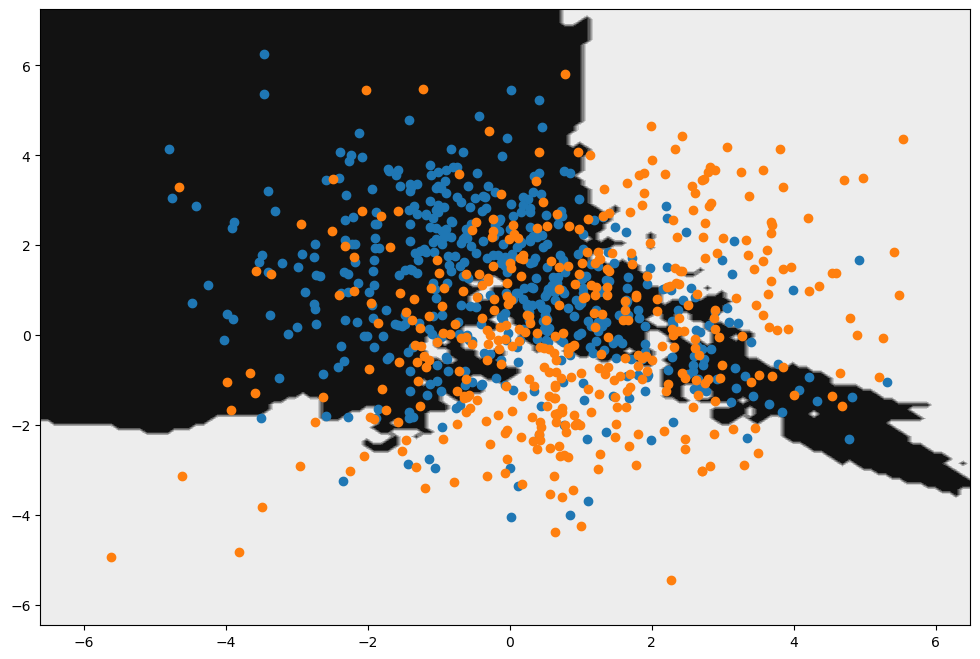

In [16]:
plt.figure(figsize=(12, 8))
plot_decision(x_test, y_test, knn_model)

In [17]:
conf_matrix_fknn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_fknn

array([[348, 145],
       [139, 268]], dtype=int64)

In [18]:
tn_fknn, fp_fknn, fn_fknn, tp_fknn = conf_matrix_fknn.ravel()
precision_fknn = tp_fknn / ( tp_fknn + fp_fknn )
recall_fknn = tp_fknn / ( tp_fknn + fn_fknn )
precision_fknn, recall_fknn

(0.648910411622276, 0.6584766584766585)

#### 3.2 Whole Feature List Training

In [19]:
k = 20

In [20]:
x_labels = list(df.columns.values)
x_labels.remove("Quality")
x = df[x_labels]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train,y_train)

y_pred_knn = knn_model.predict(x_test)
num_incorrect_knn = (y_test != y_pred_knn).sum()
total_knn = y_test.shape[0]
acc_knn = (total_knn - num_incorrect_knn) / total_knn * 100
print("Accuracy:", acc_knn)

Accuracy: 88.0


In [21]:
conf_matrix_wknn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_wknn

array([[440,  53],
       [ 55, 352]], dtype=int64)

In [22]:
tn_wknn, fp_wknn, fn_wknn, tp_wknn = conf_matrix_wknn.ravel()
precision_wknn = tp_wknn / ( tp_wknn + fp_wknn )
recall_wknn = tp_wknn / ( tp_wknn + fn_wknn )
precision_wknn, recall_wknn

(0.8691358024691358, 0.8648648648648649)